In [7]:
import cv2
import PIL
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import scipy.io as sio
import h5py

In [8]:
file_name='../../data/Fivek_dataset/Fivek_test_set.mat'
te_data= sio.loadmat(file_name)
te_clean_array=te_data["clean_images"]
print(np.shape(te_clean_array))

(200, 512, 512)


In [10]:
def add_noise(image, shot_noise=0.01, read_noise=0.0005):
    """Adds random shot (proportional to image) and read (independent) noise."""
    variance = image * shot_noise + read_noise
    sigma=np.sqrt(variance)
    noise=sigma *np.random.normal(0,1,(np.shape(image)[0],np.shape(image)[1]))

    out      = image + noise

    out=np.maximum(0.0,np.minimum(out,1.0))

    return out.astype(np.float32)

def random_noise_levels():
    """Generates random noise levels from a log-log linear distribution."""
    log_min_shot_noise = np.log(0.0001)
    log_max_shot_noise = np.log(0.012)
    log_shot_noise     = np.random.uniform(log_min_shot_noise, log_max_shot_noise)

    shot_noise = np.exp(log_shot_noise)

    line = lambda x: 2.18 * x + 1.20
    n= np.random.normal(0,0.26)
    log_read_noise = line(log_shot_noise) + n
    read_noise     = np.exp(log_read_noise)
    return shot_noise, read_noise
def make_normal_noise(image_shape):
    return np.random.normal(0,1,(image_shape[0],image_shape[1]))
def make_noise_with_sampled_normal_noise(image,normal_noise,shot_noise=0.01, read_noise=0.0005):
    """Adds random shot (proportional to image) and read (independent) noise."""
    variance = image * shot_noise + read_noise
    #print(variance[0,:10])
    sigma=np.sqrt(variance)
     
    noise=sigma * normal_noise
    return noise
def make_noisy_image(image, noise):
    out = image + noise

    out = np.maximum(0.0,np.minimum(out,1.0))

    return out.astype(np.float32)

In [78]:
# create multiple synthetic datasetsd

alpha_beta = [[0.01,0.02]] #[[0.01,0.02],[0.05,0.02],[0.01,0.0002]]

num_images = 20
num_sampling = 20
noise_arr = []
print_plt = False
clean_array, noisy_array = None, None
for alpha, beta in alpha_beta:
    sigma = beta
    #print(alpha,beta)
    # load original dataset
    with h5py.File(f"../test_fivek_rawRGB_alpha_{alpha}_beta_{sigma}_20sampling20images.hdf5",'r') as f:
        clean_array = np.array(f['clean_images'])
        noisy_array = np.array(f['noisy_images'])

In [79]:
clean_array[index].shape, clean_array[index].min(), clean_array[index].max()

((512, 512), 0.0, 0.5449219)

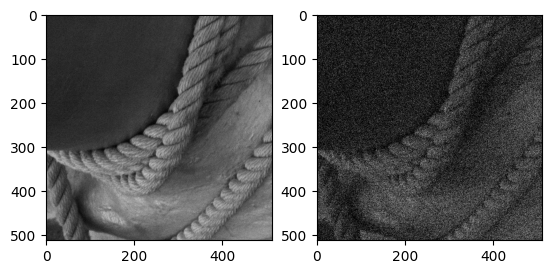

In [80]:
index = 40
plt.subplot(121)
plt.imshow(clean_array[index],cmap='gray')
plt.subplot(122)
plt.imshow(noisy_array[index],cmap='gray')
plt.pause(0.01)

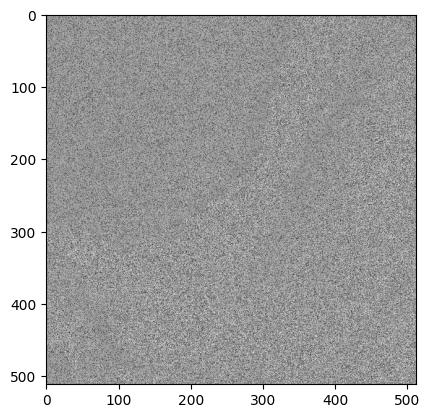

In [81]:
noise = clean_array[index] - noisy_array[index]
plt.imshow(noise,cmap='gray')

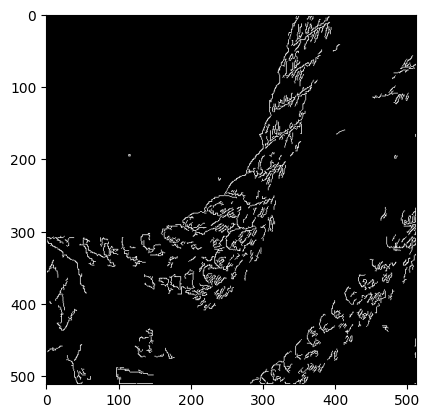

In [82]:
uint8_clean_img = (clean_array[index]*255).astype('uint8')
uint8_noisy_img = (noisy_array[index]*255).astype('uint8')
edge = cv2.Canny(uint8_clean_img,60,140)
plt.imshow(edge,cmap='gray')

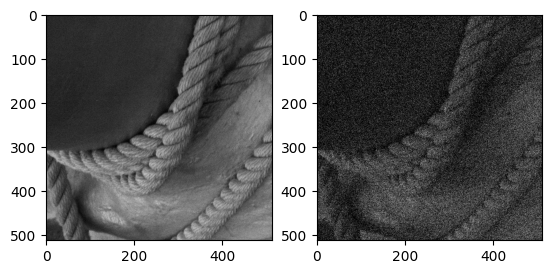

In [83]:
plt.subplot(121)
plt.imshow(uint8_clean_img - edge,cmap='gray')
plt.subplot(122)
plt.imshow(uint8_noisy_img - edge,cmap='gray')

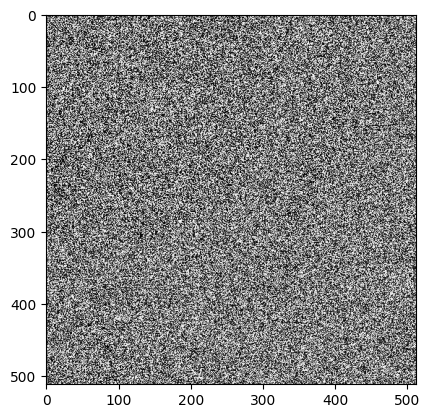

In [84]:
plt.imshow(uint8_clean_img-edge-uint8_noisy_img,cmap='gray')

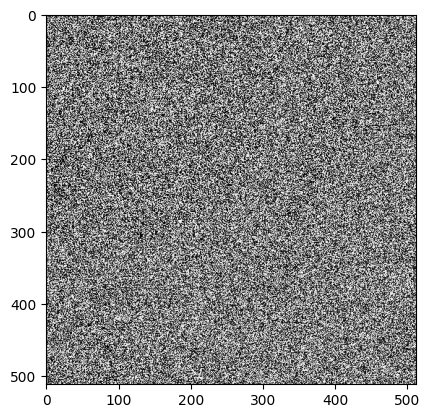

In [85]:
plt.imshow(uint8_clean_img-uint8_noisy_img,cmap='gray')

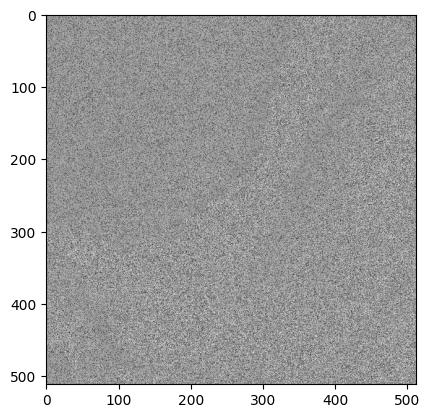

In [86]:
plt.imshow(clean_array[index]-noisy_array[index],cmap='gray')

In [87]:
from skimage.feature import hessian_matrix, hessian_matrix_eigvals

In [93]:
hxx, hxy, hyy = hessian_matrix(clean_array[index], sigma=3)
i1, i2 = hessian_matrix_eigvals([hxx, hxy, hyy])

In [110]:
hessian_matrix_eigvals?

Signature: hessian_matrix_eigvals(H_elems)
Docstring:
Compute eigenvalues of Hessian matrix.

Parameters
----------
H_elems : list of ndarray
    The upper-diagonal elements of the Hessian matrix, as returned
    by `hessian_matrix`.

Returns
-------
eigs : ndarray
    The eigenvalues of the Hessian matrix, in decreasing order. The
    eigenvalues are the leading dimension. That is, ``eigs[i, j, k]``
    contains the ith-largest eigenvalue at position (j, k).

Examples
--------
>>> from skimage.feature import hessian_matrix, hessian_matrix_eigvals
>>> square = np.zeros((5, 5))
>>> square[2, 2] = 4
>>> H_elems = hessian_matrix(square, sigma=0.1, order='rc')
>>> hessian_matrix_eigvals(H_elems)[0]
array([[ 0.,  0.,  2.,  0.,  0.],
       [ 0.,  1.,  0.,  1.,  0.],
       [ 2.,  0., -2.,  0.,  2.],
       [ 0.,  1.,  0.,  1.,  0.],
       [ 0.,  0.,  2.,  0.,  0.]])
File:      /mnt/ssd/hyun/fbi-net/env/lib/python3.9/site-packages/skimage/feature/corner.py
Type:      function


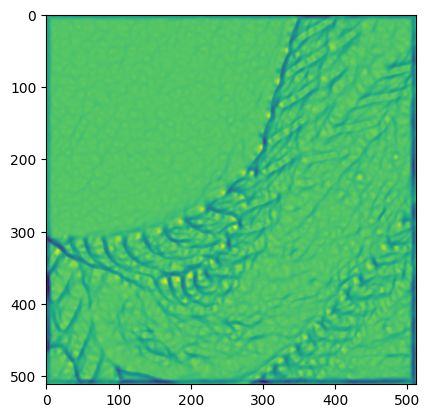

In [95]:
plt.imshow(i2)

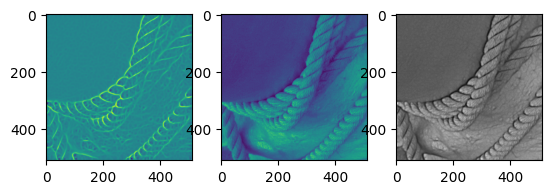

In [108]:
plt.subplot(131)
plt.imshow(i1)
plt.subplot(132)
plt.imshow(clean_array[index])
plt.subplot(133)
scaled_clean_img = (clean_array[index] - clean_array[index].min())/(clean_array[index].max() - clean_array[index].min())
scaled_i1 = (i1 - i1.min())/(i1.max() - i1.min())
plt.imshow(scaled_clean_img-scaled_i1,cmap='gray')

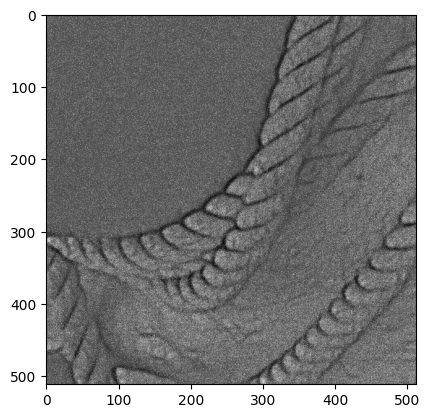

In [107]:

scaled_noisy_img = (noisy_array[index] - noisy_array[index].min())/(noisy_array[index].max() - noisy_array[index].min())
plt.imshow(noisy_array[index]-scaled_i1,cmap='gray')

In [102]:
print(clean_array[index].min(), clean_array[index].max())
print(i1.min(), i1.max())

0.0 0.5449219
-0.006025333 0.0073630847


In [89]:
hessian_matrix_eigvals?

Signature: hessian_matrix_eigvals(H_elems)
Docstring:
Compute eigenvalues of Hessian matrix.

Parameters
----------
H_elems : list of ndarray
    The upper-diagonal elements of the Hessian matrix, as returned
    by `hessian_matrix`.

Returns
-------
eigs : ndarray
    The eigenvalues of the Hessian matrix, in decreasing order. The
    eigenvalues are the leading dimension. That is, ``eigs[i, j, k]``
    contains the ith-largest eigenvalue at position (j, k).

Examples
--------
>>> from skimage.feature import hessian_matrix, hessian_matrix_eigvals
>>> square = np.zeros((5, 5))
>>> square[2, 2] = 4
>>> H_elems = hessian_matrix(square, sigma=0.1, order='rc')
>>> hessian_matrix_eigvals(H_elems)[0]
array([[ 0.,  0.,  2.,  0.,  0.],
       [ 0.,  1.,  0.,  1.,  0.],
       [ 2.,  0., -2.,  0.,  2.],
       [ 0.,  1.,  0.,  1.,  0.],
       [ 0.,  0.,  2.,  0.,  0.]])
File:      /mnt/ssd/hyun/fbi-net/env/lib/python3.9/site-packages/skimage/feature/corner.py
Type:      function
